# Abalone Age Classification Project Report

This report is for the data analysis project for DSCI 522 (Data Science workflows); a course in the Master of Data Science program at the University of British Columbia. Content includes key exploratory data analysis, statistical summaries and figures.

## Introduction

Abalones are endangered marine snails that are found in the cold coastal water around the world. The price of an abalone is positively associated with its age. However, determining how old an abalone is can be a very complex process. Having a machine learning model that classifies the age of abalones will efficiently accelerate this manual process, and benefit researchers on abalones and add value to the domain.

In this project we are classifying abalone snails into "young" and "old" according to their number of rings based on input features such as abalone's gender, height with meat in shell, weight of the shell etc.


## About the data set

The Abalone data set that was used in this project was sourced from the UC
    Irvine Machine Learning Repository published in 1995. It can be
    found <a href="https://archive-beta.ics.uci.edu/ml/datasets/abalone" >here</a>. Each row in
    the data set represents the attributes and physical measurements of
    abalones including number of rings, sex, length, diameter, height, weight,
    etc. The number of rings were
    counted manually using a microscope by the researchers. The age of an abalone is represented by its number of
    rings plus 1.5 as number of years lived. 
    
This dataset was developed in 1995. Despite the age of this dataset, predictive models that can be made from this dataset are likely still relevant for the modern day. It takes thousands to millions of years in order for any meaningful changes to be made to the biological characteristics and features of animals. Darwin's theory of evolution and natural selection applies to all animals, including abalone. Thus, the biological features of the abalone within this dataset are likely still relevant today, and meaningful predictive models can still be created from this dataset.

The `Sex` column in this dataset includes three categories: `Female`, `Male` and `Infant`. This is a curious component of the dataset since abalone sex is actually binary (male or female). Therefore, `Infant` is not really considered a sex of abalone but instead is in reference to its age. Thus, this could pose a potential limitation in the predictive model which we will discuss later.
Abalone of different sex has different body composition with distinct economic values.
The data set has already removed its missing values and the range of the continuous values have been scaled for use with an ANN (by dividing by 200).

In the research paper "A Quantitative Comparison of Dystal and Backpropagation" that David Clark, Zoltan Schreter and Anthony Adams submitted to the Australian Conference on Neural Networks (ACNN'96), the original abalone data set was treated as a 3-category classification problem (grouping ring classes 1-8, 9 and 10, and 11 on). In our project, we will treat the data set as a 2-categorical classification problem (grouping ring classes less or equal to 11, and more than 11).

Here, we aim to answer one research question with a Logistic Regression classification model: 

- **Given the input features including sex, size and weight, is an abalone young or old?**
    


## Findings and results


Considering that the price of an abalone is positively associated with its age, creating a predictive model that is able to automate the manual process of determining the age of an abalone would be valuable to those wishing to determine the age of an abalone, whether it is researchers or those interested in making a profit in the abalone market. Of note, the number of rings present on the abalone directly determines the age of the abalone. For this project, we are separating the abalone into two classes, `young` and `old`, based on a threshold on the rings. Moreover, we are using a threshold of `rings > 11` whereby abalone that contain more than 11 rings would be placed in the `old` class and otherwise the abalone would be placed in the `young` class.

In [1]:
from IPython.display import Image, HTML

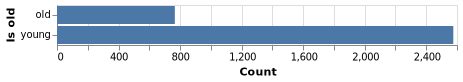

In [2]:
Image("../results/eda/target_distribution.png")

Figure 1. There is an imbalance in the distribution of young and old abalone in the training data.

After looking at the distributions of `young` and `old` abalone in the training, it's quite clear that there is a class imbalance in the age of the abalone (Figure 1). In fact, the number of `young` abalone is around triple the number of `old` abalone in the training data. In order to account for this class imbalance, we will use the f1 scoring metric as we follow through with the analysis.

Next, we looked to elaborate upon the distribution of numerical features in the training data in relation to the target class (Figure 2). The distribution of the numerical features seemed to follow a similar shape for both the `old` class and the `young` class. The distribution of the length and diameter features was left-skewed, while the whole weight, viscera weight, shucked weight, and shell weight appeared to have a right-skewed distribution. The height feature did not have a clear skewness to the distribution.

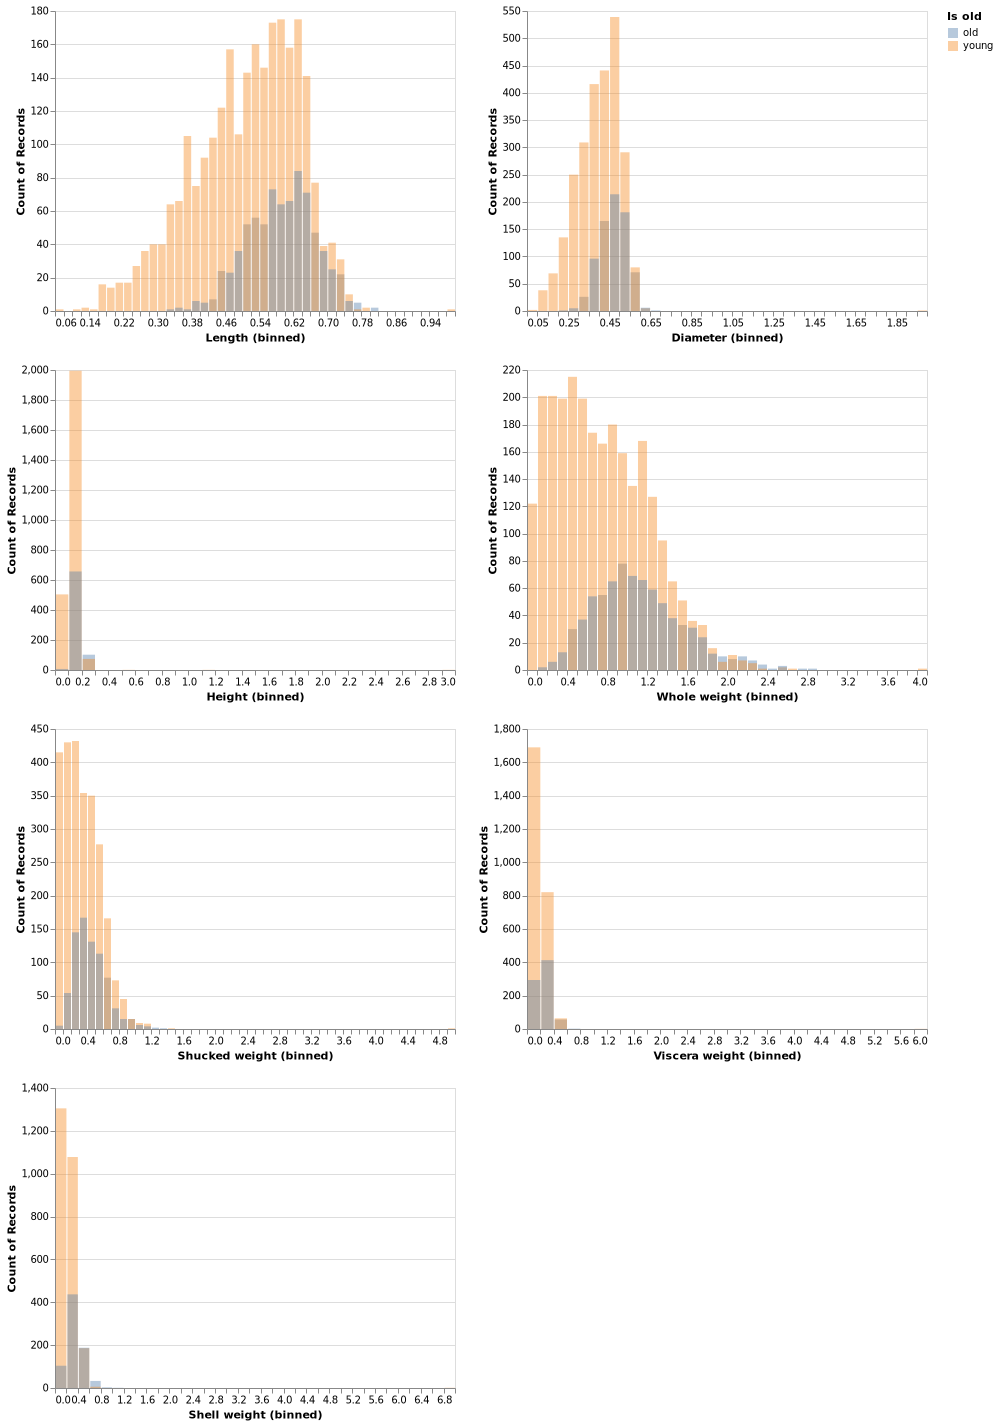

In [3]:
Image("../results/eda/histograms.png")

Figure 2. The distributions of the numerical features are similar between young and old abalone, but may provide insight into slight differences in the features between young and old abalone.

By looking at these histograms, we can see the pronounced effect of the class imbalance. The majority of the values in each numerical feature histogram has a higher proportion of `young` abalone examples compared to `old` abalone examples. It's difficult to say for certain whether there are clear distinctions in these features between the `young` and `old` class. However, there are a few areas to be aware of that might help us understand how the model might make predictions. Observing the length feature, we can see that when the length of the abalone is below 0.38, almost all of the examples are from the `young` class, with very few examples from the `old` class. Similarly for the diameter feature, when the diameter of the abalone is below 0.25, the majority of examples are from the `young` class, with hardly any examples from the `old` class. This aligns with our intuitions about abalone, since we should expect younger abalone to be smaller (i.e smaller diameter and length).

There are rare occasions when there are examples that are predominantly from the `old` class. For example, when `Shell weight` is above 0.6, the majority of examples are of the `old` class. Additionally, when `whole weight`is above 2.2, the `old` class begins to be the more predominant class. Again, this aligns with our intuitions about abalone. We would expect older abalone to be larger, and thus, have a larger whole weight. In terms of shell weight, perhaps abalone of the `old` class require a larger shell for their larger bodies compared to `young` abalone, which could explain why there are more examples of `old` abalone which have a shell weight above 0.6.

Observing the distribution of sexes in the training data, there appears to be a relatively even spread of `Female` (F), `Male` (M) within both the `young` and `old` target classes, whereas there are a greater number of `Infant` (I) examples in the `young` class compared to the `old` class (Figure 3). Specifically, there were 354 examples of abalone that were `Male` and 340 examples of abalone that were `Female` in the `old` class and there were 882 examples of abalone that were `Male` and 684 examples of abalone that were `Female` in the `young` class. For the `Infant` class, there was a greater number of examples of `Infant` in the young class (1009) compared to the `old` class (72).

In [4]:
Image("../results/eda/sex_dist.png")

FileNotFoundError: No such file or directory: '../results/eda/sex_dist.png'

FileNotFoundError: No such file or directory: '../results/eda/sex_dist.png'

<IPython.core.display.Image object>

Figure 3. There is an even distribution of male and female abalone within the young and old classes, but a major imbalance in the infant category between young and old abalone.

As expected, there is no roughly bias for one particular sex (`Male` or `Female`) depending on if the abalone is old or young. However, the greater number of `Infant` abalone in the `young` class does give pause. Our intuitions do indeed tell us that more `Infant` abalone would classified as `young`, but the bigger issue in this dataset could be that we are predicting whether an abalone is `young` or `old`, after being given information about whether an abalone is an `Infant`, which creates redundancy in the predictive model. It is curious why the researchers decided to include the category `Infant` within the `Sex` feature column. Perhaps when an abalone is an `infant`, it is difficult to classify the abalone as `Male` or `Female`. Without speaking to domain experts, it is difficult to determine the significance behind having an `Infant` category within the `Sex` feature.

Since the target classes, `old` and `young`, are directly determined by counting the number of `rings`, we were able to determine the correlation of numerical features with the number of `rings`, as well as the correlation among other features (Figure 4). Based on the correlation values, many of the features are highly correlated with other features. As for correlation with `rings`, the `Shell weight` seemed to have the greatest correlation value (0.69) with `rings`, while `Shucked weight` appeared to have the lowest correlation with `rings` (0.54). Based on the correlation heat map, it appears that the numerical features are at least moderately correlated with `rings`.

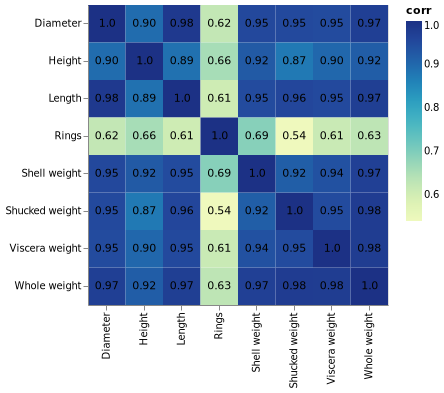

In [5]:
Image("../results/eda/correlation_map.png")

Figure 4. Features are highly correlated with each other and moderately correlated with rings, which is a proxy for the age of the abalone.

These correlation values give us some insight into how the predictive model might make its decision. For example, since `Shell weight` and `Rings` have a moderately high correlation, the `Shell weight` might be an important feature for predicting the age of the abalone. In the context of abalone, this could mean that older abalone require a heavier shell, whereas younger abalone may only need a lighter shell. With these correlation values, our model might be able to pick up on these types of associations. One trend to note is that many of the explanatory features are correlated with each other. For example, the `Diameter` of an abalone is highly correlated with the `Length` of the abalone. This is quite understandable, considering that as an abalone gets larger in diameter, one might expect the length of the abalone to also get larger. However, this does pose some implications for our model. It begs the question, how essential is it to include every single explanatory feature in this model? If `Diameter` is encapsulating the information provided by `Length`, would it be necessary to include both of these features? Discussing with domain experts can help us to determine which features may be more essential, or in the event that we lack access to domain experts, we could conduct automated feature selection in the future to address the redundancy in explanatory features.

## Model results

An important note about the training data is that there exists a class imbalance between `old` and `young` target classes. With more examples of the target class, `young`, this could have an effect on the accuracy of the model. Because of this fact, we are considering the f1 score to account for this class imbalance.

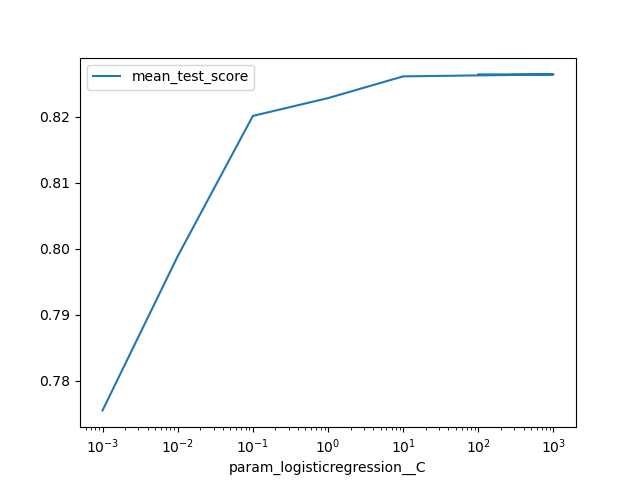

In [6]:
Image("../results/model/cv_result.png")

Figure 5. As the hyperparameter C of logistic regression increases, the validation score increases before leveling off at higher values of C.

We fit a logistic regression on the training data as we are dealing with a binary classification problem. The model set the target class `old` as 0 and `young` as 1. We first built a preprocessor which transformed the `Sex` category by using One-Hot-Encoding and we applied standard scaler on other numeric features. We then used a Grid Search cross validation to determine the best hyperparameter for the logistic regression. As we can see, as the value of C increases, the model's performance on validation sets increase and plateau at around $C = 100$. Note that the hyperparameter, C, of logistic regression is associated with the regularization strength (complexity penalty) of the model. Based on the tuning results, the best logistic regression model occurs when $C = 100$ (Figure 5 and Table 1). 

In [7]:
HTML('../results/model/train_result_table.html')

Table 1. A closer look to each parameter and validation score

In [8]:
HTML("../results/model/test_result_table.html")

Table 2. Test results on different metrics

After fitting the model, we used a test set to assess how the model would perform on novel examples. The evaluation metrics on the test data set is shown (Table 2). Based on the model's performance on the test set, the f1 score is 0.9, where the f1 score is the harmonic mean of the model's recall score and precision score.

To understand how the features in the dataset are influencing the model's predictions, we calculated the coefficients to demonstrate the importance of each feature in the model (Figure 6 and Table 3).

In [9]:
HTML("../results/model/coeff_sorted.html")

Table 3. Feature importance in our logistic model

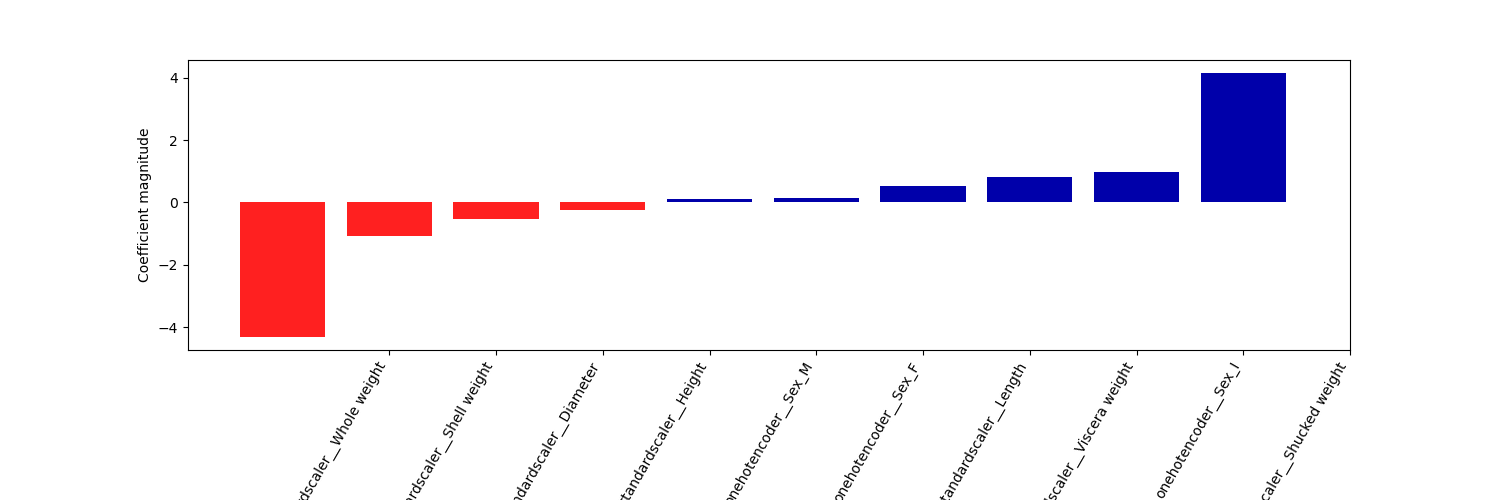

In [10]:
Image("../results/model/coeff_bar.png")

Figure 6. Shucked weight appears to be an important feature in the predictive model for predicting the young class, while Whole weight is an important feature in the predictive model for predicting the old class.

Based on the coefficients, `Shucked weight` influences the model the most towards predicting that an abalone is `young`, whereas `whole_weight` influences the model the most towards predicting that an abalone is `old`.

It is interesting to observe that the `Whole weight` of an abalone and the `Shucked weight` of an abalone are influence the predictions in opposite directions. By observing the distribution of `shucked weight` (Figure 2), the shapes of the distributions are quite similar between `old` and `young` abalone, and at no point in the distribution are there more examples of `old` abalone compared to `young` abalone. In contrast, above a certain threshold, there are more examples of `old` abalone in the `whole weight` and `shucked weight` distributions. Understanding the distributions of these weight features helps us to understand why different types of weight are influencing the prediction in opposite directions. It would be useful to consult a domain expert to see if they would have insight in the differences between `old` and `young` abalone in regard to the different types of weight features. However, it's imperative that one takes these feature importances and model performance with a grain of salt, considering that the dataset is imbalanced and that these statistical models don't necessarily explain how the real world works.

## Summary of Findings

Based on the model results, we can see that the logistic regression model is performing well on new examples of abalone, as described by an f1 score of 0.90. Moreover, given a certain set of biological features of abalone, we're able to predict whether an abalone is `old` or `young` fairly accurately while minimizing false negatives and false positives. We were able to obtain these results by testing different values for the model's hyperparameter, C, on various validation sets of the abalone training data in order to obtain an optimal logistic regression model (where $C = 100$). We also obtained the coefficients of the various biological features that helped us understand how the features were influencing the prediction. The weight features (`shucked weight`, `whole weight`, and `shell weight`) specifically had a large influence on the model's predictions. Contrasting the distributions of these weight features between the `old` and `young` abalone helped us to investigate why `shucked weight` was having an opposite predictive effect in comparison with `whole weight` and `shell weight`, although consulting with domain experts may help us further understand this opposing effect. Overall, the model's ability to predict whether an abalone is `young` or `old` based on specific biological characteristics is good but should be taken with a grain of salt given the imbalance of `young` and `old` abalone within the dataset, as well as some of the limitations of the included biological characteristics.

## Limitations and assumptions
One limitation is that we found some of the input features are highly correlated. For example, the correlation between `whole weight` and `length` of abalone is 0.97, indicating that these two features are highly positively correlated. This will potentially raise the multicollinearity concern. As a result, it can become difficult for the model to estimate the relationship between each independent variable and the dependent variable independently. One method to address correlated features is to use recursive feature elimination to exclude features with little importance so we can fit a more interpretable model. Additionally, the high correlation between many of the features may insinuate that many of the features are redundant and the inclusion of all of them may be unnecessary. For example, including both `Diameter` and `Length` conveys very similar messages about the biology of the abalone, and may indicate that it is unnecessary to include both of these biological features. Since our primary goal is to make classification on the abalone age (old or young), and we don’t need to understand the role of each independent variable such as `weight` and `height`, we did not take additional actions to reduce the multicollinearity problem in this project.

We fit a logistic regression and tuned it by using grid search. Other classification models like decision tree or KNN can be used in this project. We chose logistic regression for its good interpretability and its performance. However, with better feature engineering or better model selection, the performance can be improved.



## Future directions 
Future analyses can be performed to improve this classification model. For example, we are interested in adding additional features such as: the geographical location where the abalones are collected, abalone species, color, number of predators and living environment etc. Consultation with domain experts must also be considered for appropriate and accurate analysis directions.

## References

```{bibliography} references.bib
:all:
```